<a href="https://colab.research.google.com/github/djibril6/djibril6-OptimizationAlgorithms-/blob/main/ParticleSwarm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Particle Swarm Optimization
## Djibril ISSOUFOU MAMAN

In [ ]:
%matplotlib inline 

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
import time

## Particle Swarm algorithm

In [ ]:
def pso(cost_function, interval, swarm_size = 20, dimension=1, w=0.72, lambd=2.1, iteration=500, minimization=True, seed=1):
  """
    Particle Swarm optimization function
    Parameters: 
        cost_function --------> The cost function we want to optimize. Ex: f(x)
        interval -------------> the interval for searching parameter. Ex: ([-3, -2], [3, 2])
        swarm_size -----------> the number of particle (Kuş) we want to use
        dimension ------------> number or parameter for the cost_function. Ex: dimension=2 if there are 2, x and y
        lambd ----------------> Value of parameter lamdda, 2.1 by default
        iteration ------------> number of iteration, 
        minimization ---------> Set True if we want to minimize the cos_function
        seed -----------------> to try the algorithm with different seed value

    Return:
        this function print the best minimum or maximum found and print the convergence of the algorithm over time
        And return "best_fitness_global_list" the list of best fitness found for every iteration
  """
  np.random.seed(seed) ## The seed we chose
  tic = time.time()
  min = 0
  max = 0
  if len(interval) == 1:
    min = np.ones((dimension, 1)) * interval[0][0]
    max = np.ones((dimension, 1)) * interval[0][1]
  else:
    min, max = interval
    min = np.array(min).reshape(dimension, 1)
    max = np.array(max).reshape(dimension, 1)

  ## INITIALIZATION OF PARICLES
  current_position = min + (max - min) * np.random.randn(dimension, swarm_size) ## Particles position
  current_fitness = cost_function(current_position) ## the result has (1, swarm_size) dimension
  current_fitness = current_fitness.reshape(swarm_size, 1).T
  best_position = current_position
  best_fitness = current_fitness
  velocity = (min + (max - min) * np.random.randn(dimension, swarm_size))/2 ## Velocity
  best_index_g = 1
  best_fitness_global_list = []

  for i in range(iteration):
    if minimization:
      best_index_g = np.argmin(best_fitness)
    else:
      best_index_g = np.argmax(best_fitness) 

    best_fitness_global_list.append(best_fitness[:, best_index_g]) ## then after we can plot the fitness evolution

    ## MOVING OF PARTICLES (KUŞ)
    velocity = w*velocity + lambd*np.random.random_sample()*(best_position - current_position) + lambd*np.random.random_sample()*(best_position[:, best_index_g].reshape(dimension, 1) - current_position)
    current_position = current_position + velocity
    current_fitness = cost_function(current_position)
    current_fitness.reshape(swarm_size, 1).T

    # Now We must control the velocity and position of all particle to keep them in the good interval
    # If the Position is not in the good interval then the value will be max or min
    velocity = np.ma.masked_array(velocity, mask = (velocity >= max).astype(int)).filled(max)
    velocity = np.ma.masked_array(velocity, mask = (velocity <= min).astype(int)).filled(min)

    current_position = np.ma.masked_array(current_position, mask = (current_position >= max).astype(int)).filled(max)
    current_position = np.ma.masked_array(current_position, mask = (current_position <= min).astype(int)).filled(min)
    velocity = np.ma.masked_array(velocity, mask = (current_position >= max).astype(int)).filled(0)
    velocity = np.ma.masked_array(velocity, mask = (current_position <= min).astype(int)).filled(0)

    if minimization:
      # Getting the best fitness
      temp_current = (current_fitness < best_fitness).astype(int) * current_fitness
      temp_best = (current_fitness >= best_fitness).astype(int) * best_fitness
      best_fitness = temp_current + temp_best

      # Getting the best position
      temp_current = (temp_current / current_fitness) * current_position
      temp_best = (temp_best / best_fitness).reshape(1, swarm_size) * best_position
      best_position = temp_current + temp_best

    else:
      # Getting the best fitness
      temp_current = (current_fitness > best_fitness).astype(int) * current_fitness
      temp_best = (current_fitness <= best_fitness).astype(int) * best_fitness
      best_fitness = temp_current + temp_best

      #Getting the best position
      temp_current = (temp_current / current_fitness) * current_position
      temp_best = (temp_best / best_fitness).reshape(1, swarm_size) * best_position
      best_position = temp_current + temp_best

  toc = time.time()
  print("best is : {} with parameters {}".format(best_fitness[:, best_index_g], best_position[:, best_index_g]))
  print("Computation time: {}".format(toc-tic))
  plt.suptitle("Convergence")
  plt.plot(best_fitness_global_list)
  return best_fitness_global_list


# **Problem 1**
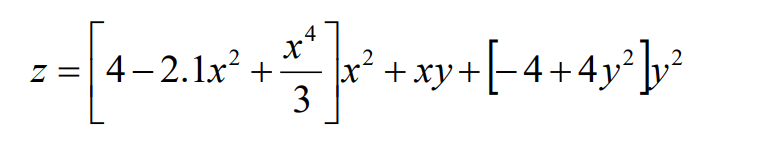

In [ ]:
def z(X):
  """ cost function 1: """
  x, y = X[0], X[1]
  return (4 - 2.1*(x**2) + (x**4)/3)*(x**2) + x*y + (4*(y**2) - 4)*(y**2)

### Computing the particle swarm optimization with 5 different value of seed  

best is : [-1.03079912] with parameters [-0.10309889  0.71774343]
Computation time: 0.1403210163116455


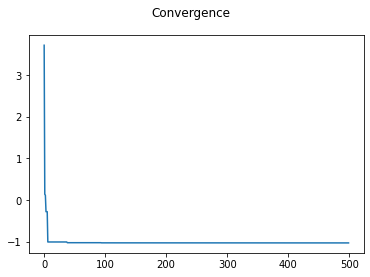

In [ ]:
# seed = 10
best_fit_list1 = pso(z, interval=([-3, -2], [3, 2]), swarm_size = 20, dimension=2, w=.7, lambd=2.1, iteration=500, minimization=True, seed=10)

best is : [-1.03162845] with parameters [ 0.08984201 -0.71265641]
Computation time: 0.13058829307556152


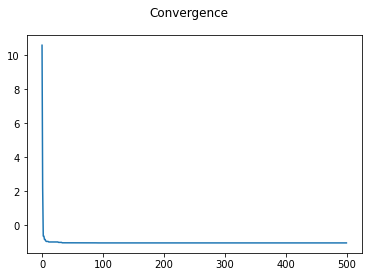

In [ ]:
# with seed = 20
best = pso(z, interval=([-3, -2], [3, 2]), swarm_size = 20, dimension=2, w=.7, lambd=2.1, iteration=500, minimization=True, seed=20)

best is : [-1.03162845] with parameters [ 0.08984201 -0.7126564 ]
Computation time: 0.12081503868103027


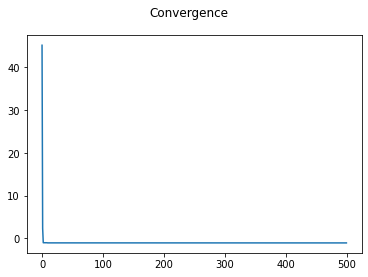

In [ ]:
# with seed = 30
best = pso(z, interval=([-3, -2], [3, 2]), swarm_size = 20, dimension=2, w=.7, lambd=2.1, iteration=500, minimization=True, seed=30)

best is : [-1.03162845] with parameters [-0.08984201  0.71265641]
Computation time: 0.11721491813659668


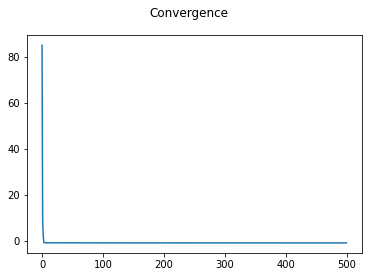

In [ ]:
# with seed = 40
best = pso(z, interval=([-3, -2], [3, 2]), swarm_size = 20, dimension=2, w=.7, lambd=2.1, iteration=500, minimization=True, seed=40)

best is : [-1.03162845] with parameters [ 0.08984201 -0.7126564 ]
Computation time: 0.11438250541687012


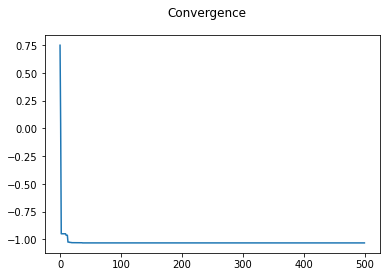

In [ ]:
# with seed = 50
best = pso(z, interval=([-3, -2], [3, 2]), swarm_size = 20, dimension=2, w=.7, lambd=2.1, iteration=500, minimization=True, seed=50)

**As we can see, the computation time is around 0.13 seconds and we always get a good approximation of the minimum for this cost function (-1.3162845) just with 500 iterations and 20 particles no matter the value of seed we choose, but sometimes with differents parameters (In (-0.08984, 0.71265) and (0.08984, -0.71265) we get the same fitness value: -1.3162845)**. It is because our cost function z(x, y) is even function so z(x, y) = z(-x, -y). Let's see the plot:

Text(0.5, 0.92, 'z(x, y) is an Even function')

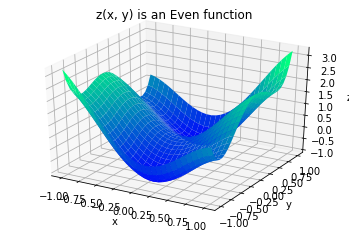

In [ ]:
x = np.linspace(-1, 1, 30)
y = np.linspace(-1, 1, 30)
X, Y = np.meshgrid(x, y)
Z = z([X, Y])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='winter', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("z(x, y) is an Even function")

# **Problem 2**
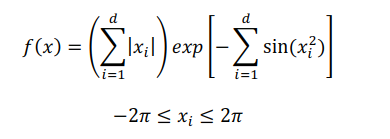

In [ ]:
def f(X):
  """ cost function 2: """
  return np.sum(np.abs(X), axis=0) * np.exp(-1 * np.sum(np.sin(np.power(X, 2)), axis=0))

best is : [4.00738102e-09] with parameters [-9.29697236e-11  3.40987693e-09  5.04534366e-10]
Computation time: 0.11915159225463867


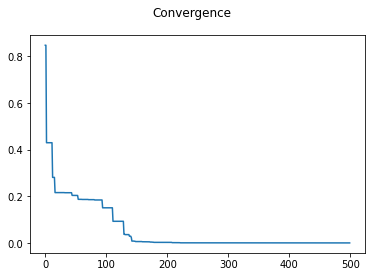

In [ ]:
# seed = 10
dimension = 3
### The best minimum we found is with w = 0.7
best_fit_list2 = pso(f, interval=([-2*np.pi, 2*np.pi], ), swarm_size = 20, dimension=dimension, w=.7, lambd=2.1, iteration=500, minimization=True, seed=10)

best is : [3.17878882e-11] with parameters [-2.10048717e-11  9.21076792e-12  1.57224860e-12]
Computation time: 0.15435004234313965


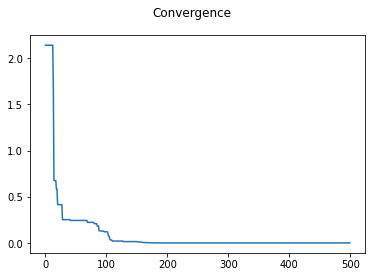

In [ ]:
# seed = 20
dimension = 3
### The best minimum we found is with w = 0.62
best = pso(f, interval=([-2*np.pi, 2*np.pi], ), swarm_size = 20, dimension=dimension, w=.62, lambd=2.1, iteration=500, minimization=True, seed=20)

best is : [9.95198876e-08] with parameters [4.85542036e-08 5.91073972e-09 4.50549443e-08]
Computation time: 0.15163207054138184


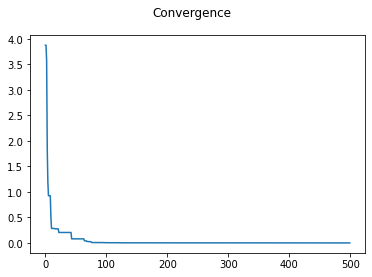

In [ ]:
# seed = 30
dimension = 3
### The best minimum we found is with w = 0.72
best = pso(f, interval=([-2*np.pi, 2*np.pi], ), swarm_size = 20, dimension=dimension, w=.72, lambd=2.1, iteration=500, minimization=True, seed=30)

best is : [0.00083303] with parameters [ 7.84063603e-04  2.48958686e-05 -2.40670512e-05]
Computation time: 0.13201570510864258


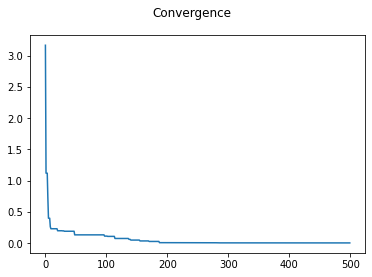

In [ ]:
# seed = 40
dimension = 3
### The best minimum we found is with w = 0.81
best = pso(f, interval=([-2*np.pi, 2*np.pi], ), swarm_size = 20, dimension=dimension, w=.81, lambd=2.1, iteration=500, minimization=True, seed=40)

best is : [0.00254581] with parameters [ 8.76767594e-04 -2.08417878e-05 -1.64821109e-03]
Computation time: 0.12801623344421387


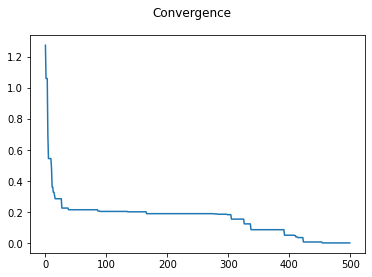

In [ ]:
# seed = 50
dimension = 3
### The best minimum we found is with w = 0.82
best = pso(f, interval=([-2*np.pi, 2*np.pi], ), swarm_size = 20, dimension=dimension, w=.82, lambd=2.1, iteration=500, minimization=True, seed=50)

**Depend of the seed we chosed the result is a litle different and we have to deel with parameter w (The Inertia weight) to get the best optimization.** So the best optimization we found is: **3.17e-11 with parameters (-2.1e-11, 9.21e-12,  1.57e-12)** which are  a very good approximation of 0 (Assume we use our function with 3 parameters: d=3).

## Visualization of convergence of the 2 problems

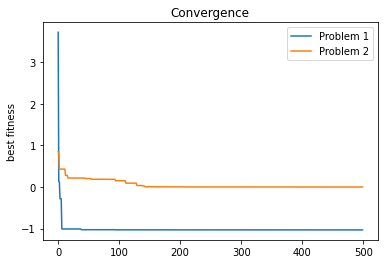

In [ ]:
plt.plot(best_fit_list1, label = "Problem 1")
plt.plot(best_fit_list2, label = "Problem 2")
plt.ylabel('best fitness')
plt.title('Convergence')
plt.legend()
plt.show()

# Conclusion

The Particle Swarm Optimization is very good but we have to adapt it to the problem we want to optimize. Indeed we must deel we hyperparameters w (Inertia weight) which depend of the problem to choose and it is a good practice to fix a seed for random numbers generator to get a good stability. 